In [3]:
import pandas as pd
import numpy as np
import random
import math
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
from scipy import stats
import seaborn as sns
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter
from sklearn import svm
%matplotlib inline
plt.style.use("seaborn-whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import the data
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
# data.head()
df = data.copy()
df.head(6)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER


In [5]:
# omitting Dermason and Bombay

newdf_1 = (df[df['Class'] != 'DERMASON'])
newdf = (newdf_1[newdf_1['Class'] != 'BOMBAY'])

In [6]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9543 entries, 0 to 10064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             9543 non-null   int64  
 1   Perimeter        9543 non-null   float64
 2   MajorAxisLength  9543 non-null   float64
 3   MinorAxisLength  9543 non-null   float64
 4   AspectRation     9543 non-null   float64
 5   Eccentricity     9543 non-null   float64
 6   ConvexArea       9543 non-null   int64  
 7   EquivDiameter    9543 non-null   float64
 8   Extent           9543 non-null   float64
 9   Solidity         9543 non-null   float64
 10  roundness        9543 non-null   float64
 11  Compactness      9543 non-null   float64
 12  ShapeFactor1     9543 non-null   float64
 13  ShapeFactor2     9543 non-null   float64
 14  ShapeFactor3     9543 non-null   float64
 15  ShapeFactor4     9543 non-null   float64
 16  Class            9543 non-null   object 
dtypes: float64(14

In [7]:
newdf['Class'] = newdf['Class'].astype('category')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9543 entries, 0 to 10064
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             9543 non-null   int64   
 1   Perimeter        9543 non-null   float64 
 2   MajorAxisLength  9543 non-null   float64 
 3   MinorAxisLength  9543 non-null   float64 
 4   AspectRation     9543 non-null   float64 
 5   Eccentricity     9543 non-null   float64 
 6   ConvexArea       9543 non-null   int64   
 7   EquivDiameter    9543 non-null   float64 
 8   Extent           9543 non-null   float64 
 9   Solidity         9543 non-null   float64 
 10  roundness        9543 non-null   float64 
 11  Compactness      9543 non-null   float64 
 12  ShapeFactor1     9543 non-null   float64 
 13  ShapeFactor2     9543 non-null   float64 
 14  ShapeFactor3     9543 non-null   float64 
 15  ShapeFactor4     9543 non-null   float64 
 16  Class            9543 non-null   category

In [8]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
newdf['y'] = labelencoder.fit_transform(newdf['Class'])
newdf

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,y
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,58063,941.882,366.689523,202.790970,1.808214,0.833160,58936,271.897237,0.735012,0.985187,0.822463,0.741492,0.006315,0.001178,0.549810,0.994174,SIRA,4
10061,58074,910.115,351.958861,210.417832,1.672667,0.801610,58609,271.922992,0.777648,0.990872,0.881047,0.772599,0.006061,0.001332,0.596909,0.998430,SIRA,4
10062,59431,956.785,390.489073,194.564645,2.006989,0.867028,60276,275.081623,0.689839,0.985981,0.815820,0.704454,0.006570,0.000998,0.496256,0.995979,SIRA,4
10063,60493,931.321,363.814243,212.613752,1.711151,0.811464,61239,277.528521,0.791814,0.987818,0.876428,0.762830,0.006014,0.001256,0.581910,0.995736,SIRA,4


In [9]:
# Now use inverse_transform to revert the changes at any time may be at the end of predictions to analyse the data with predictions
# newdf['Class'] = labelencoder.inverse_transform(newdf['y'])
# newdf

In [10]:
newdf.columns

# column of class is true class
# column of y is encoded labels of true class

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'y'],
      dtype='object')

In [11]:
# This section prints out the following:
# whether there are exact duplicate rows in the dataframe and remove the duplicated row
# how many null values are in each column of newdf dataframe

print("\nCleaning Summary\n{}".format("-"*35))
print("Total records:", newdf.shape[0])
duplicate_rows = newdf.duplicated()
if True in duplicate_rows:
    newdf = newdf[~duplicate_rows]
print("Removed {} duplicate rows".format(np.where(duplicate_rows==True)[0].size))

print("\nMissing Value Summary Below\n{}".format("-"*35))
print("\nDry Beans Dataset with DERMASON and BOMBAY removed\n{}".format("-"*15))

print(newdf.isnull().sum(axis = 0))


Cleaning Summary
-----------------------------------
Total records: 9543
Removed 68 duplicate rows

Missing Value Summary Below
-----------------------------------

Dry Beans Dataset with DERMASON and BOMBAY removed
---------------
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
y                  0
dtype: int64


In [12]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,9475.0,54246.242639,15237.122410,28395.000000,42182.500000,49550.000000,65965.500000,116272.000000
Perimeter,9475.0,885.767760,142.726610,610.291000,767.141500,856.830000,1006.717500,1359.763000
MajorAxisLength,9475.0,332.287984,62.679064,200.524796,280.913396,328.499128,385.220132,534.484404
MinorAxisLength,9475.0,206.628103,25.691650,148.167484,188.541017,199.261078,225.554252,331.305270
AspectRation,9475.0,1.614737,0.278410,1.024868,1.429195,1.600374,1.781521,2.430306
Eccentricity,9475.0,0.754323,0.106077,0.218951,0.714442,0.780742,0.827600,0.911423
ConvexArea,9475.0,55004.321478,15558.523496,28715.000000,42675.500000,50168.000000,67042.500000,118497.000000
EquivDiameter,9475.0,260.356994,35.816652,190.141097,231.750787,251.175276,289.810081,384.762405
Extent,9475.0,0.747188,0.052578,0.555315,0.714660,0.760516,0.786316,0.866195
Solidity,9475.0,0.986764,0.005054,0.919246,0.984737,0.987980,0.990095,0.994378


In [13]:
newdf['Class'].value_counts()
#for col in newdf:
 #   print(newdf[col].unique())

# after removing 68 rows of dupcliated values, we arrive at the following spread of classes
# encoded labels
# SIRA = 4
# SEKER = 3
# HOROZ = 2
# CALI = 1
# BARBUNYA = 0

SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
Name: Class, dtype: int64

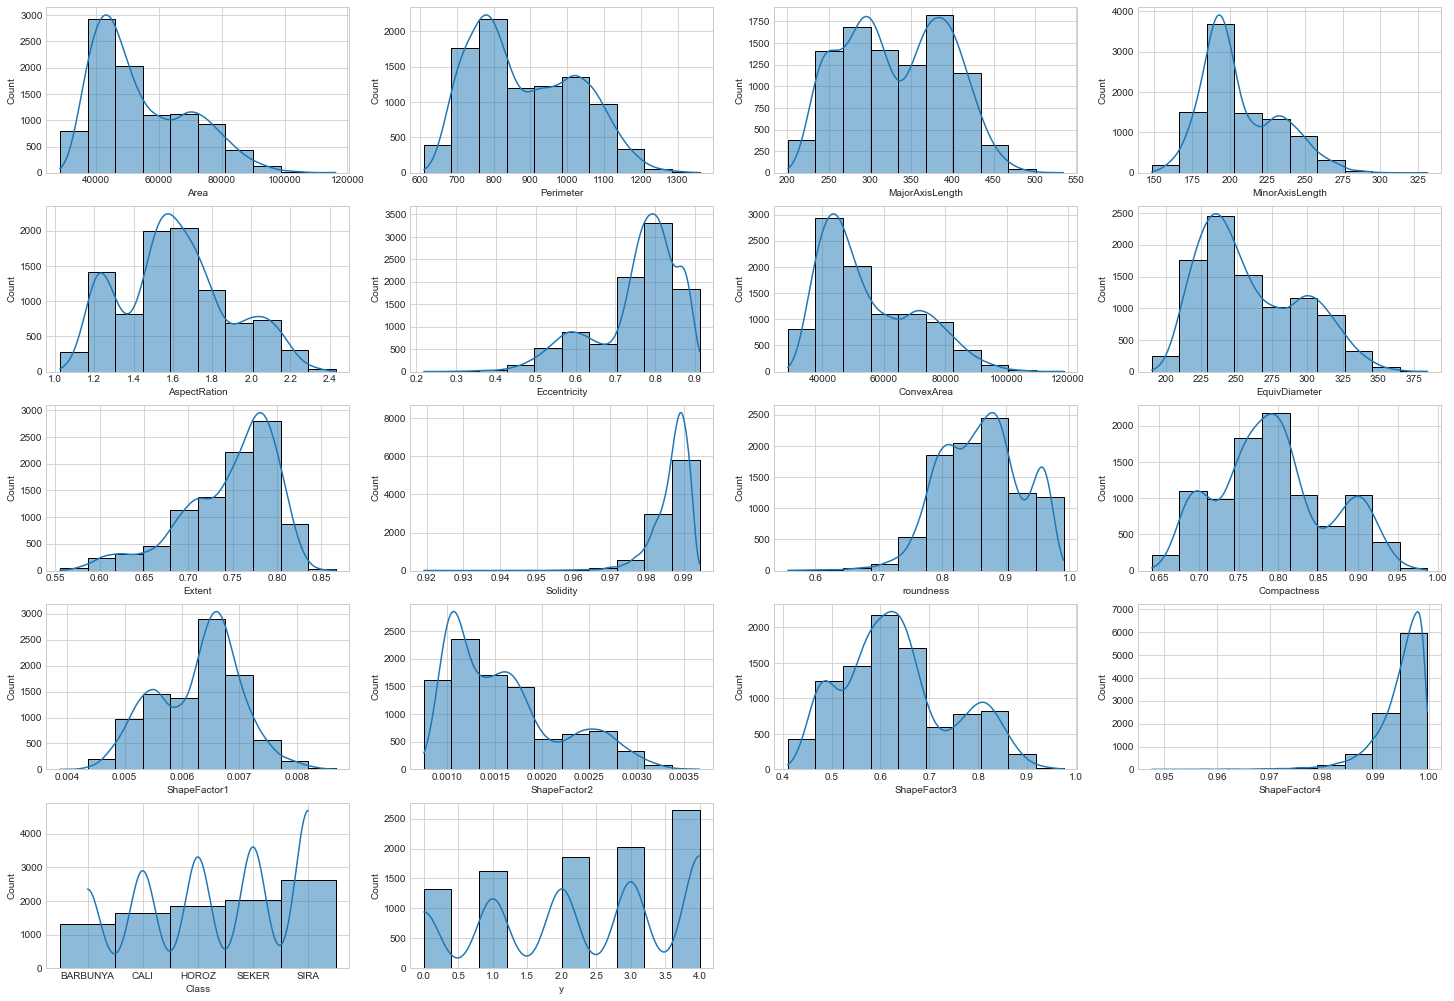

In [14]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(newdf.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(newdf[col], kde=True, bins=10)

<AxesSubplot:>

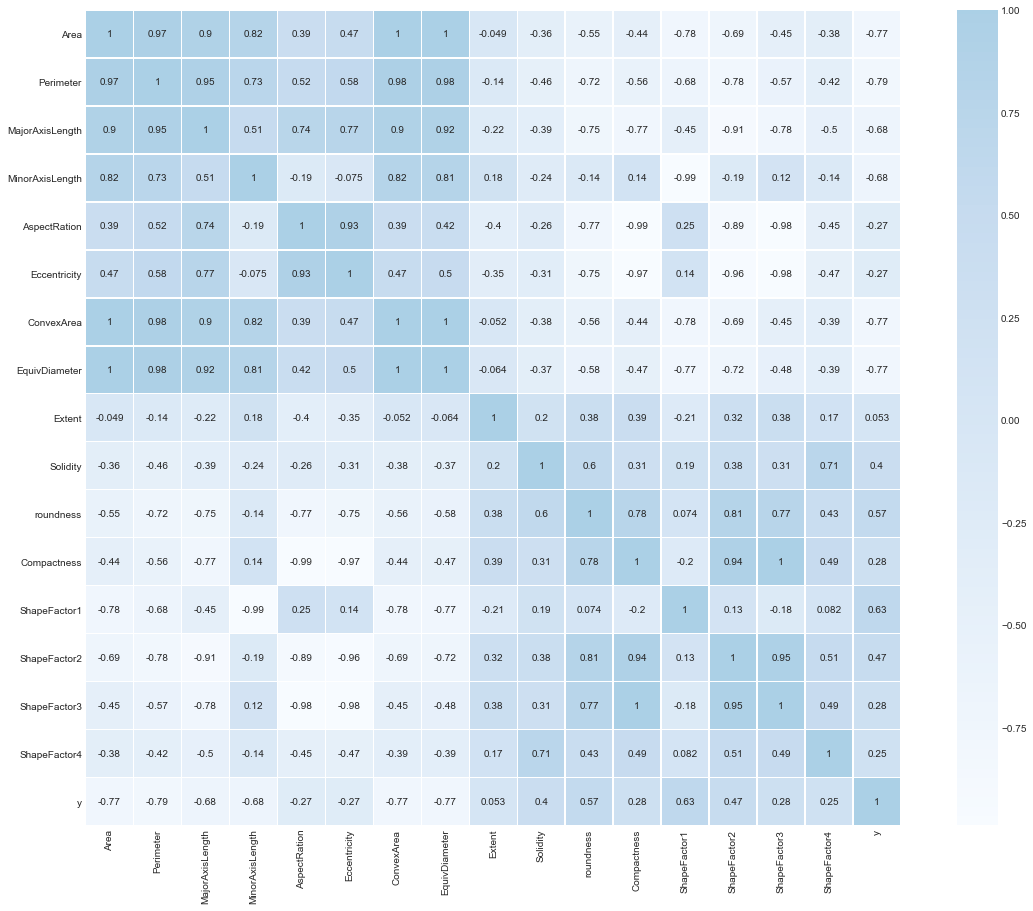

In [15]:
corr = newdf.corr()
f,axes = plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr, square=True, annot = True, linewidth = .5, center = 2, ax = axes, cmap='Blues')

In [16]:
data_df = newdf
data_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,y
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,3
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,3
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,3
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,58063,941.882,366.689523,202.790970,1.808214,0.833160,58936,271.897237,0.735012,0.985187,0.822463,0.741492,0.006315,0.001178,0.549810,0.994174,SIRA,4
10061,58074,910.115,351.958861,210.417832,1.672667,0.801610,58609,271.922992,0.777648,0.990872,0.881047,0.772599,0.006061,0.001332,0.596909,0.998430,SIRA,4
10062,59431,956.785,390.489073,194.564645,2.006989,0.867028,60276,275.081623,0.689839,0.985981,0.815820,0.704454,0.006570,0.000998,0.496256,0.995979,SIRA,4
10063,60493,931.321,363.814243,212.613752,1.711151,0.811464,61239,277.528521,0.791814,0.987818,0.876428,0.762830,0.006014,0.001256,0.581910,0.995736,SIRA,4


In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(data_df.iloc[:,:16])

StandardScaler()

In [19]:
X_features = scaler.transform(data_df.iloc[:,:16])
X_features

array([[-1.69668565, -1.93020277, -1.98018938, ...,  2.62363873,
         1.76815055,  0.87629773],
       [-1.67443618, -1.73592601, -2.10229913, ...,  3.33058695,
         2.43923589,  0.81437058],
       [-1.63203749, -1.83337619, -1.90602972, ...,  2.45458982,
         1.69404119,  0.94849639],
       ...,
       [ 0.34028938,  0.49760159,  0.92860609, ..., -1.02569917,
        -1.23079464,  0.29733184],
       [ 0.40999126,  0.31918116,  0.50300564, ..., -0.58745036,
        -0.47074053,  0.24598301],
       [ 0.61469951,  0.69026679,  1.09521587, ..., -1.04455114,
        -1.16332701, -1.26493057]])

In [20]:
X_features_df = pd.DataFrame(X_features, columns=['Area','Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
                                                  'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 
                                                  'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 
                                                  'ShapeFactor3', 'ShapeFactor4'])
X_features_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.696686,-1.930203,-1.980189,-1.274386,-1.499831,-1.928051,-1.689795,-1.960529,0.318299,0.413972,1.515088,1.707037,1.418264,2.623639,1.768151,0.876298
1,-1.674436,-1.735926,-2.102299,-0.930067,-1.858440,-3.229319,-1.660420,-1.928932,0.699572,-0.351811,0.403181,2.285133,0.939460,3.330587,2.439236,0.814371
2,-1.632037,-1.833376,-1.906030,-1.194886,-1.454854,-1.806292,-1.627125,-1.869232,0.588210,0.553020,1.355684,1.641617,1.299401,2.454590,1.694041,0.948496
3,-1.590820,-1.680811,-1.942218,-0.938549,-1.656275,-2.410710,-1.560662,-1.811821,0.675095,-1.992014,0.667914,1.920717,0.991120,2.737870,2.012811,-0.078278
4,-1.582157,-1.861235,-2.081189,-0.636381,-1.989759,-3.965669,-1.580395,-1.799830,0.492819,0.817055,1.935614,2.522843,0.557270,3.502679,2.723630,0.969575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9470,0.250504,0.393180,0.548881,-0.149361,0.694974,0.743250,0.252716,0.322220,-0.231590,-0.311900,-0.608130,-0.745988,0.039400,-0.720923,-0.755580,-0.083484
9471,0.251226,0.170596,0.313851,0.147516,0.208084,0.445803,0.231697,0.322939,0.579367,0.812793,0.309418,-0.302000,-0.306424,-0.458766,-0.337648,0.814200
9472,0.340289,0.497602,0.928606,-0.469573,1.408976,1.062547,0.338847,0.411133,-1.090793,-0.154835,-0.712177,-1.274622,0.385547,-1.025699,-1.230795,0.297332
9473,0.409991,0.319181,0.503006,0.232993,0.346321,0.538710,0.400745,0.479454,0.848801,0.208641,0.237073,-0.441425,-0.369346,-0.587450,-0.470741,0.245983


In [21]:
Y_true_class = data_df.iloc[:,17:18]
Y_true_class

,y
0,3
1,3
2,3
3,3
4,3
...,...
10060,4
10061,4
10062,4
10063,4


In [22]:
Y_true_class = Y_true_class.reset_index(drop=True)

In [23]:
Y_true_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9475 entries, 0 to 9474
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       9475 non-null   int32
dtypes: int32(1)
memory usage: 37.1 KB


In [24]:
data_df_final = X_features_df.join(Y_true_class, how='left').reset_index()
data_df_final = data_df_final.iloc[:, 1:]
data_df_final

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,-1.696686,-1.930203,-1.980189,-1.274386,-1.499831,-1.928051,-1.689795,-1.960529,0.318299,0.413972,1.515088,1.707037,1.418264,2.623639,1.768151,0.876298,3
1,-1.674436,-1.735926,-2.102299,-0.930067,-1.858440,-3.229319,-1.660420,-1.928932,0.699572,-0.351811,0.403181,2.285133,0.939460,3.330587,2.439236,0.814371,3
2,-1.632037,-1.833376,-1.906030,-1.194886,-1.454854,-1.806292,-1.627125,-1.869232,0.588210,0.553020,1.355684,1.641617,1.299401,2.454590,1.694041,0.948496,3
3,-1.590820,-1.680811,-1.942218,-0.938549,-1.656275,-2.410710,-1.560662,-1.811821,0.675095,-1.992014,0.667914,1.920717,0.991120,2.737870,2.012811,-0.078278,3
4,-1.582157,-1.861235,-2.081189,-0.636381,-1.989759,-3.965669,-1.580395,-1.799830,0.492819,0.817055,1.935614,2.522843,0.557270,3.502679,2.723630,0.969575,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9470,0.250504,0.393180,0.548881,-0.149361,0.694974,0.743250,0.252716,0.322220,-0.231590,-0.311900,-0.608130,-0.745988,0.039400,-0.720923,-0.755580,-0.083484,4
9471,0.251226,0.170596,0.313851,0.147516,0.208084,0.445803,0.231697,0.322939,0.579367,0.812793,0.309418,-0.302000,-0.306424,-0.458766,-0.337648,0.814200,4
9472,0.340289,0.497602,0.928606,-0.469573,1.408976,1.062547,0.338847,0.411133,-1.090793,-0.154835,-0.712177,-1.274622,0.385547,-1.025699,-1.230795,0.297332,4
9473,0.409991,0.319181,0.503006,0.232993,0.346321,0.538710,0.400745,0.479454,0.848801,0.208641,0.237073,-0.441425,-0.369346,-0.587450,-0.470741,0.245983,4


In [25]:
data_df_final.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [26]:
data_df_final['y'].astype('category')

0       3
1       3
2       3
3       3
4       3
       ..
9470    4
9471    4
9472    4
9473    4
9474    4
Name: y, Length: 9475, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

In [27]:
data_df_final.iloc[:, :16]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-1.696686,-1.930203,-1.980189,-1.274386,-1.499831,-1.928051,-1.689795,-1.960529,0.318299,0.413972,1.515088,1.707037,1.418264,2.623639,1.768151,0.876298
1,-1.674436,-1.735926,-2.102299,-0.930067,-1.858440,-3.229319,-1.660420,-1.928932,0.699572,-0.351811,0.403181,2.285133,0.939460,3.330587,2.439236,0.814371
2,-1.632037,-1.833376,-1.906030,-1.194886,-1.454854,-1.806292,-1.627125,-1.869232,0.588210,0.553020,1.355684,1.641617,1.299401,2.454590,1.694041,0.948496
3,-1.590820,-1.680811,-1.942218,-0.938549,-1.656275,-2.410710,-1.560662,-1.811821,0.675095,-1.992014,0.667914,1.920717,0.991120,2.737870,2.012811,-0.078278
4,-1.582157,-1.861235,-2.081189,-0.636381,-1.989759,-3.965669,-1.580395,-1.799830,0.492819,0.817055,1.935614,2.522843,0.557270,3.502679,2.723630,0.969575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9470,0.250504,0.393180,0.548881,-0.149361,0.694974,0.743250,0.252716,0.322220,-0.231590,-0.311900,-0.608130,-0.745988,0.039400,-0.720923,-0.755580,-0.083484
9471,0.251226,0.170596,0.313851,0.147516,0.208084,0.445803,0.231697,0.322939,0.579367,0.812793,0.309418,-0.302000,-0.306424,-0.458766,-0.337648,0.814200
9472,0.340289,0.497602,0.928606,-0.469573,1.408976,1.062547,0.338847,0.411133,-1.090793,-0.154835,-0.712177,-1.274622,0.385547,-1.025699,-1.230795,0.297332
9473,0.409991,0.319181,0.503006,0.232993,0.346321,0.538710,0.400745,0.479454,0.848801,0.208641,0.237073,-0.441425,-0.369346,-0.587450,-0.470741,0.245983


In [28]:
class_0_df = data_df_final[data_df_final['y']=='0']
class_1_df = data_df_final[data_df_final['y']=='1']
class_2_df = data_df_final[data_df_final['y']=='2']
class_3_df = data_df_final[data_df_final['y']=='3']
class_4_df = data_df_final[data_df_final['y']=='4']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_df_final.iloc[:, :16], data_df_final.iloc[:, 16:17], 
                                                    test_size=0.15, random_state=42)

In [30]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
4871,2.363153,2.146785,1.932493,1.918112,0.564118,0.671029,2.354376,2.195473,0.151482,-0.363008,-0.991318,-0.658202,-1.713223,-1.076432,-0.674308,-0.885435
1052,-0.976761,-1.198724,-1.322773,-0.212079,-1.347502,-1.540274,-0.984228,-1.018643,0.714800,0.983872,1.678336,1.483792,0.066420,1.589160,1.516788,0.931734
696,-1.098313,-1.271461,-1.420657,-0.387292,-1.357641,-1.564047,-1.098769,-1.167461,0.542890,0.541679,1.393947,1.494210,0.268925,1.705043,1.528422,0.793923
8,-1.546387,-1.752301,-1.894733,-0.913612,-1.612402,-2.264913,-1.540094,-1.750599,0.463594,0.330827,1.455770,1.882604,0.912661,2.630873,1.968880,0.924626
99,-1.385062,-1.663287,-1.751262,-0.657475,-1.587402,-2.185727,-1.390136,-1.533812,0.433505,1.231749,2.026584,1.846719,0.580497,2.386768,1.927634,1.032678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.137582,0.185261,0.742961,-1.210682,1.952843,1.243273,-0.145093,-0.074721,-2.621444,0.379510,-1.154988,-1.621376,1.327598,-1.092060,-1.529287,0.831534
5191,-0.620048,0.839273,0.481233,-1.893398,2.440594,1.373416,-0.543289,-0.601060,-1.800543,-4.831760,-4.769501,-1.924333,2.448299,-1.122941,-1.781504,0.327027
5390,-0.388692,-0.065154,0.419066,-1.339002,1.677854,1.157314,-0.386389,-0.343673,-1.815757,-0.082848,-1.108801,-1.455180,1.538044,-0.940439,-1.387530,0.376365
860,-1.038325,-1.221671,-1.365622,-0.314218,-1.337243,-1.516486,-1.041627,-1.093568,0.093322,0.716762,1.453538,1.468024,0.181435,1.625360,1.499199,0.897741


In [31]:
y_train

,y
4871,1
1052,3
696,3
8,3
99,3
...,...
5734,2
5191,2
5390,2
860,3


In [32]:
#SMOTE to give new balanced data sets
seed = 123
neighbors = 5
sm = SMOTE(sampling_strategy='not majority', k_neighbors=neighbors, random_state=seed)
X_resample_train, Y_resample_train = sm.fit_resample(X_train, y_train)

In [33]:
X_resample_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,2.363153,2.146785,1.932493,1.918112,0.564118,0.671029,2.354376,2.195473,0.151482,-0.363008,-0.991318,-0.658202,-1.713223,-1.076432,-0.674308,-0.885435
1,-0.976761,-1.198724,-1.322773,-0.212079,-1.347502,-1.540274,-0.984228,-1.018643,0.714800,0.983872,1.678336,1.483792,0.066420,1.589160,1.516788,0.931734
2,-1.098313,-1.271461,-1.420657,-0.387292,-1.357641,-1.564047,-1.098769,-1.167461,0.542890,0.541679,1.393947,1.494210,0.268925,1.705043,1.528422,0.793923
3,-1.546387,-1.752301,-1.894733,-0.913612,-1.612402,-2.264913,-1.540094,-1.750599,0.463594,0.330827,1.455770,1.882604,0.912661,2.630873,1.968880,0.924626
4,-1.385062,-1.663287,-1.751262,-0.657475,-1.587402,-2.185727,-1.390136,-1.533812,0.433505,1.231749,2.026584,1.846719,0.580497,2.386768,1.927634,1.032678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,-0.707833,-0.825856,-1.005287,-0.033602,-1.099265,-1.030379,-0.711717,-0.701364,0.162627,0.501424,1.016525,1.139304,-0.122745,1.059015,1.137467,0.874000
11266,-1.110245,-1.333152,-1.621619,-0.013794,-1.783501,-2.893009,-1.113843,-1.182549,0.581650,0.806200,1.698589,2.160906,-0.144339,2.444915,2.292581,0.918648
11267,-1.177092,-1.406146,-1.461983,-0.555991,-1.305801,-1.446116,-1.185259,-1.265886,0.090480,1.251420,1.737624,1.423249,0.463085,1.703431,1.449442,0.893797
11268,-1.492828,-1.681538,-1.830203,-0.855166,-1.567748,-2.125345,-1.489410,-1.677938,0.958224,0.557398,1.375588,1.807650,0.843998,2.472303,1.882858,0.761840


In [34]:
Y_resample_train

,y
0,1
1,3
2,3
3,3
4,3
...,...
11265,3
11266,3
11267,3
11268,3


In [35]:
Y_resample_train.value_counts()

y
0    2254
1    2254
2    2254
3    2254
4    2254
dtype: int64

In [36]:
data = []
for bags in (100,200,300,400,500):
    for pur in (0.00,0.02,0.04,0.06,0.08,0.10):
        for leafs in (1,2,6,10):
            rf_model = RandomForestClassifier(n_estimators=bags, criterion='gini', max_depth=None,
                                              min_samples_split=2, min_samples_leaf=leafs, min_weight_fraction_leaf=0.0,
                                              max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=pur,
                                              bootstrap=True, oob_score=True, n_jobs=-1, random_state=1, verbose=0,
                                              warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
            rf_model_fit = rf_model.fit(X_resample_train,np.ravel(Y_resample_train)) #training the model
            
            rf_model_fit_train = rf_model_fit.predict(X_resample_train) #predict the training model results
            
            oob_acc = round(accuracy_score(Y_resample_train, rf_model_fit_train),3) #accuracy of the traininng set
            
            rf_model_fit_test = rf_model_fit.predict(X_test) #predict the test model results
            
            test_acc = round(accuracy_score(y_test, rf_model_fit_test),3) #accuracy of the test set
            
            data.append([bags,pur,leafs, oob_acc, test_acc])
            
results_1 = pd.DataFrame(columns=['n_estimators', 'min_impurity_decrease','min_samples_leaf', 'OOB Acc', 'Test Acc'], data=data)

In [37]:
# RUNNNING THE BEST PARAMETERS
rf_model = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None,
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                  max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                  bootstrap=True, oob_score=True, n_jobs=-1, random_state=2, verbose=0,
                                  warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

rf_model_fit = rf_model.fit(X_resample_train,np.ravel(Y_resample_train)) #training the model

rf_model_fit_train = rf_model_fit.predict(X_resample_train) #predict the training model results

print(accuracy_score(Y_resample_train, rf_model_fit_train)) #accuracy of the traininng set

rf_model_fit_test = rf_model_fit.predict(X_test) #predict the test model results

print(accuracy_score(y_test, rf_model_fit_test)) #accuracy of the test set

train_cm_1 = confusion_matrix(Y_resample_train, rf_model_fit_train)
test_cm_1 = confusion_matrix(y_test, rf_model_fit_test)

1.0
0.940225035161744


In [38]:
cm_y_test = confusion_matrix(y_test, rf_model_fit_test)
cm_y_test

array([[178,  10,   2,   1,   2],
       [ 11, 233,   5,   2,   1],
       [  1,   7, 269,   0,   8],
       [  2,   0,   0, 296,  12],
       [  1,   1,   9,  10, 361]], dtype=int64)

In [39]:
cm_y_train = confusion_matrix(Y_resample_train, rf_model_fit_train)
cm_y_train

array([[2254,    0,    0,    0,    0],
       [   0, 2254,    0,    0,    0],
       [   0,    0, 2254,    0,    0],
       [   0,    0,    0, 2254,    0],
       [   0,    0,    0,    0, 2254]], dtype=int64)

In [40]:
results_1.sort_values(by='Test Acc', ascending=False)

,n_estimators,min_impurity_decrease,min_samples_leaf,OOB Acc,Test Acc
72,400,0.0,1,1.000,0.942
96,500,0.0,1,1.000,0.941
0,100,0.0,1,1.000,0.940
74,400,0.0,6,0.973,0.940
24,200,0.0,1,1.000,0.940
...,...,...,...,...,...
119,500,0.1,10,0.773,0.821
20,100,0.1,1,0.772,0.819
21,100,0.1,2,0.772,0.819
22,100,0.1,6,0.772,0.819


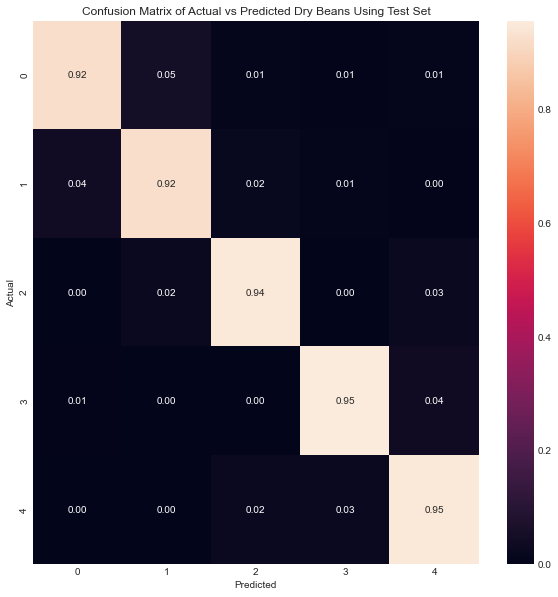

In [41]:
# Normalise
cmn = cm_y_test.astype('float') / cm_y_test.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.title("Confusion Matrix of Actual vs Predicted Dry Beans Using Test Set")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [43]:
X_train_svm = X_resample_train[(Y_resample_train['y']==3) | (Y_resample_train['y']==4)]
Y_train_svm = Y_resample_train[(Y_resample_train['y']==3) | (Y_resample_train['y']==4)]
X_test_svm = X_test[(y_test['y']==3) | (y_test['y']==4)]
Y_test_svm = y_test[(y_test['y']==3) | (y_test['y']==4)]

In [44]:
def hilb_hist(k,g):
    dis = [] #empty list to store distances
    k = k
    g = g
    index_hilb = random.sample(range(850),k)
    CL4 = X_res_train[(Y_resample_train[(Y_resample_train['y']==4)].iloc[index_hilb]
    CL3 = X_res_train[(Y_resample_train[(Y_resample_train['y']==3)].iloc[index_hilb]
    for i in range(k):
        for j in range(k):
            hil = math.sqrt(2 - (2*math.exp(-g*pow(abs(math.dist(CL3.iloc[i],CL4.iloc[j])),2))))
            dis.append(hil)
    return (dis)

np.mean(hilb_hist(k=300, g=1))
plt.hist(hilb_hist(k=300, g=1))
sns.histplot(hilb_hist(k=300, g=0.0001), stat='probability')

SyntaxError: invalid syntax (<ipython-input-44-6a115e12c6c1>, line 7)

In [45]:
rad_svm = []
for gamma in (0.01, 0.05, 0.1, 0.5, 1):
    for cost in (0.1, 1, 5, 10, 20, 30, 50):
        radial_svm = svm.SVC(kernel='rbf', gamma=gamma, C=cost, decision_function_shape='ovo',
                             random_state=1).fit(X_train_svm,np.ravel(Y_train_svm))
        
        radial_svm_train_pred = radial_svm.predict(X_train_svm)
        radial_svm_test_pred = radial_svm.predict(X_test_svm)
        
        acc_train = round(radial_svm.score(X_train_svm, Y_train_svm),3)
        acc_test = round(radial_svm.score(X_test_svm, Y_test_svm),3)
        
        rad_svm.append([gamma,cost, acc_train,acc_test])
        
results_2 = pd.DataFrame(columns=['Gamma', 'Cost', 'Train Acc', 'Test Acc'], data=rad_svm)

In [55]:
results_2.sort_values(by='Test Acc', ascending=False)

,Gamma,Cost,Train Acc,Test Acc
7,0.05,0.1,0.974,0.975
1,0.01,1.0,0.974,0.973
14,0.10,0.1,0.974,0.973
0,0.01,0.1,0.969,0.970
2,0.01,5.0,0.977,0.970
8,0.05,1.0,0.978,0.970
26,0.50,30.0,0.991,0.970
21,0.50,0.1,0.975,0.970
16,0.10,5.0,0.984,0.968
3,0.01,10.0,0.977,0.968


In [48]:
radial_svm = svm.SVC(kernel='rbf', gamma=0.05, C=0.1, decision_function_shape='ovo', random_state=1).fit(X_train_svm,np.ravel(Y_train_svm))
radial_svm_train_pred = radial_svm.predict(X_train_svm)
radial_svm_test_pred = radial_svm.predict(X_test_svm)

In [53]:
round(radial_svm.score(X_train_svm, Y_train_svm),3)

0.974

In [54]:
round(radial_svm.score(X_test_svm, Y_test_svm),3)

0.975

In [56]:
cm_y_test_svm = confusion_matrix(Y_test_svm, radial_svm_test_pred)
cm_y_test_svm

array([[298,  12],
       [  5, 377]], dtype=int64)

In [57]:
cm_y_train_svm = confusion_matrix(Y_train_svm, radial_svm_train_pred)
cm_y_train_svm

array([[2168,   86],
       [  32, 2222]], dtype=int64)

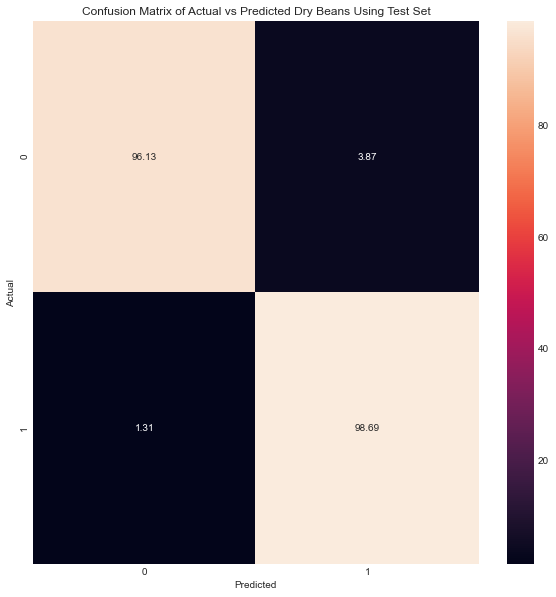

In [59]:
# Normalise
cmn = cm_y_test_svm.astype('float')*100 / cm_y_test_svm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.title("Confusion Matrix of Actual vs Predicted Dry Beans Using Test Set")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

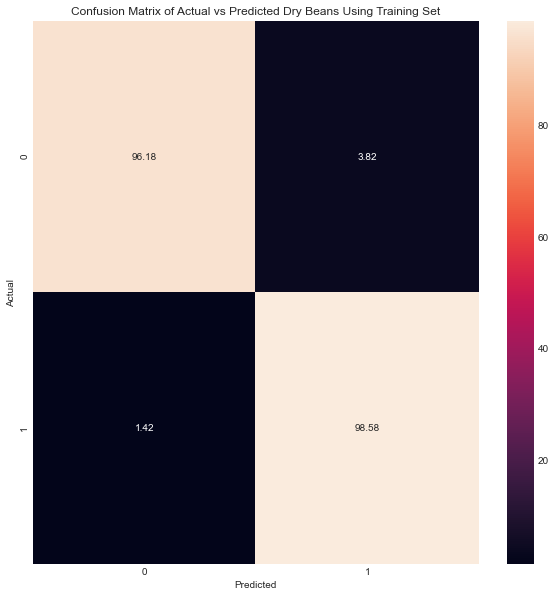

In [60]:
# Normalise
cmn = cm_y_train_svm.astype('float')*100 / cm_y_train_svm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.title("Confusion Matrix of Actual vs Predicted Dry Beans Using Training Set")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)